In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset.iloc[:,1:2].values

#feature scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
training_set_scaled=ms.fit_transform(training_set)

making the timestep 60 for 1 output

In [4]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i:i+1,0])
x_train,y_train=np.array(x_train),np.array(y_train)


reshaping the x_train

In [5]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building the RNN


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

adding the first lstm layer with dropout reguralisation

In [8]:
regressor=Sequential()

In [9]:

regressor.add(LSTM(units=60,return_sequences=True,input_shape =(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding second lstm layer with some dropout reguralisation

In [10]:
regressor.add(LSTM(60,return_sequences=True))
regressor.add(Dropout(0.2))

adding the third sequential layer with some dropout reguralisation

In [11]:
regressor.add(LSTM(units=60,return_sequences=True))
regressor.add(Dropout(0.2))

Adding the fourth and final lstm layer with dropout regurlisation

In [12]:
regressor.add(LSTM(units=60))
regressor.add(Dropout(0.2))

Adding the output layer

In [13]:
regressor.add(Dense(units=1))

#Compling the RNN

In [14]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

fitting the dataset to the rnn model

In [15]:
regressor.fit(x_train,y_train,epochs=80,batch_size=32)

Epoch 1/80
38/38 [==============================] - 31s 132ms/step - loss: 0.0891
Epoch 2/80
38/38 [==============================] - 5s 133ms/step - loss: 0.0067
Epoch 3/80
38/38 [==============================] - 5s 125ms/step - loss: 0.0050
Epoch 4/80
38/38 [==============================] - 5s 131ms/step - loss: 0.0063
Epoch 5/80
38/38 [==============================] - 5s 125ms/step - loss: 0.0042
Epoch 6/80
38/38 [==============================] - 5s 130ms/step - loss: 0.0044
Epoch 7/80
38/38 [==============================] - 5s 132ms/step - loss: 0.0049
Epoch 8/80
38/38 [==============================] - 5s 127ms/step - loss: 0.0044
Epoch 9/80
38/38 [==============================] - 6s 145ms/step - loss: 0.0037
Epoch 10/80
38/38 [==============================] - 5s 138ms/step - loss: 0.0049
Epoch 11/80
38/38 [==============================] - 5s 127ms/step - loss: 0.0041
Epoch 12/80
38/38 [==============================] - 5s 142ms/step - loss: 0.0035
Epoch 13/80
38/38 [=====

importing the test dataset

In [16]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
test_set=dataset_test.iloc[:,1:2].values

predicting the value of test set

In [21]:
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
totals=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
totals=totals.reshape(-1,1)
totals=ms.transform(totals)

In [30]:
x_test=[]
for i in range(60,80):
  x_test.append(totals[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
y_pred=regressor.predict(x_test)

In [34]:
y_pred=ms.inverse_transform(y_pred)

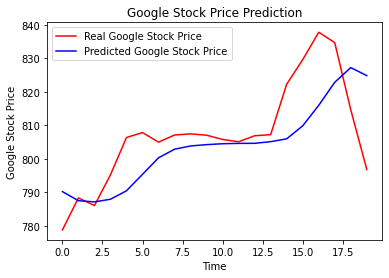

In [35]:
plt.plot(test_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()